# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import openweathermapy as ow
import openweathermapy.core as owm

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country= []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)



# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    countries = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        country.append(countries)
       


len(cities)

#print (cities)

#city_df = pd.DataFrame({"City":cities,
                       # "Country":country})
#city_df.head(30)



#lat_lng_df = pd.DataFrame ({"Latitude":lats,
                            #"Longitude":lngs})


#len(lat_lng_df)



626

In [3]:
#len(city_df)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [8]:
#q_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
city_count = 0
API_City = []
Cloudiness =[]
API_Country =[]
Date =[]
Humidity =[]
Lat =[]
Lng =[]
Max_Temp =[]
Wind_Speed =[]

for city in cities :
    city_count = city_count + 1 
    response = requests.get(query_url + city).json()
    city_id = response.get("id")
    city_name = response.get("name")

    if response.get("id"):
        print(f'{city_count}{city_name}')
        API_City.append(city_name)
        Cloudiness.append(response["clouds"]["all"])
        API_Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Wind_Speed.append(response["wind"]["speed"])
    else:
        print(f'Not Found')    
    
    

1Ushuaia
2Georgetown
3Mataura
4Atuona
5Punta Arenas
6Taihe
Not Found
Not Found
Not Found
Not Found
11Kodiak
12Torbay
Not Found
14Jamestown
Not Found
16Egvekinot
17Upernavik
18Chokurdakh
19San Patricio
20Puerto Colombia
21Dalianwan
22Barrow
23Busselton
24Merauke
25Guerrero Negro
26Luebo
27Hearst
28Hilo
29Bluff
30Tuktoyaktuk
31Waipawa
32Geraldton
33Sabha
34Hermanus
35Yulara
36Moi
37Livingston
38Ancud
39Boden
40Saskylakh
41Pokhara
42Rikitea
43Vaini
44Albany
45Yellowknife
46Qaanaaq
47Chernyshevskiy
48Gumdag
49Khatanga
50Hasaki
51Qaqortoq
52Hithadhoo
53Lasa
54New Norfolk
55Dutlwe
56General Roca
57Leningradskiy
58Nikolskoye
59Bara
60Oussouye
61Amasya
62Saint George
63Bambous Virieux
64Kirakira
65Aleksandrov Gay
66Souillac
67Dikson
68Marzuq
69Port Alfred
70Hobart
Not Found
72Kaitangata
73Bombay
Not Found
75Castro
76Mishkino
77Padang
78Faya
79Thompson
80Alyangula
Not Found
82Tazovskiy
83Cabo San Lucas
84Beringovskiy
85Hofn
86Pisco
87Cayenne
88Mar del Plata
89Shache
90Meulaboh
91Pangnirtung
92M

In [22]:
#convert to list
weather_data = {"City" : API_City,
               "Cloudiness": Cloudiness,
               "Country": API_Country,
               "Date" : Date,
               "Humidity" : Humidity,
               "Latitude" : Lat,
               "Longitude" : Lng,
               "Max Temp" : Max_Temp,
               "Wind Speed" : Wind_Speed}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_df = pd.DataFrame(weather_data)
weather_df.head(30)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Ushuaia,20,AR,1574129986,75,-54.81,-68.31,44.60,4.70
1,Georgetown,20,GY,1574130111,88,6.80,-58.16,80.60,4.70
2,Mataura,100,NZ,1574130111,76,-46.19,168.86,53.01,15.01
3,Atuona,0,PF,1574130111,76,-9.80,-139.03,79.70,12.21
4,Punta Arenas,75,CL,1574129901,66,-53.16,-70.91,48.20,5.82
5,Taihe,0,CN,1574130111,39,26.80,114.92,57.65,7.70
6,Kodiak,75,US,1574130112,87,39.95,-94.76,55.00,3.36
7,Torbay,90,CA,1574130112,66,47.66,-52.73,37.99,3.36
8,Jamestown,84,AU,1574130112,9,-33.21,138.60,94.78,14.09
9,Egvekinot,0,RU,1574130112,93,66.32,-179.17,1.36,8.86


In [24]:
weather_df.to_csv(r'C:\Users\lecha\Desktop\API\weather_df')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

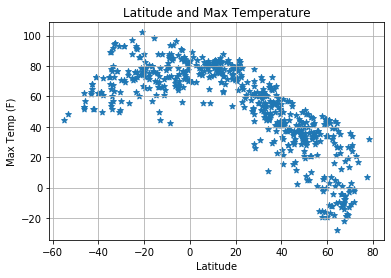

In [26]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"], marker="*")
plt.title("Latitude and Max Temperature")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig(r"C:\Users\lecha\Desktop\API\max_temp.png")


plt.show()

# this shows the relationship between latitude and max temp. it appears that the lower  the lattitude gets the higher the temp increases until about 20 degrees where it flucuates between 40 and 100 with a concentration between 60 and 90

#### Latitude vs. Humidity Plot

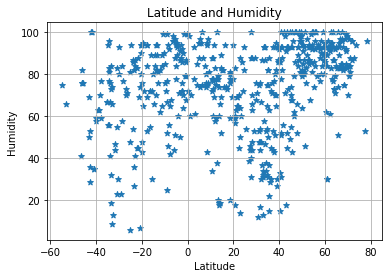

In [27]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="*")
plt.title("Latitude and Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig(r"C:\Users\lecha\Desktop\API\humidity.png")


plt.show()

# Humidity appears eveny dispersed to me 

#### Latitude vs. Cloudiness Plot

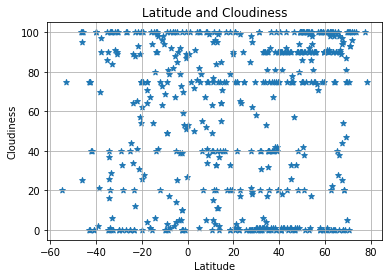

In [28]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="*")
plt.title("Latitude and Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig(r"C:\Users\lecha\Desktop\API\Cloudiness")


plt.show()

# Cloudiness appears evenly dispersed to me

#### Latitude vs. Wind Speed Plot

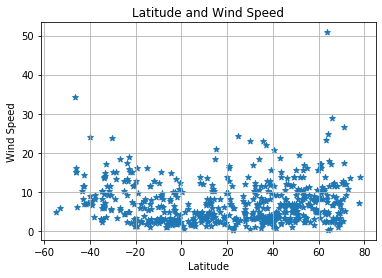

In [30]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="*")
plt.title("Latitude and Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig(r"C:\Users\lecha\Desktop\API\Wind_Speed")


plt.show()

## Linear Regression

# Wind Speed appears evenly dispersed to me

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [78]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8151657406810827


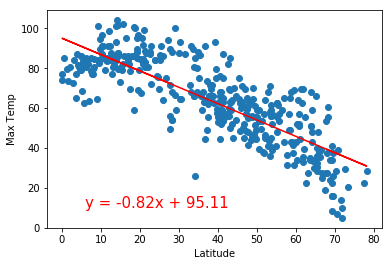

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


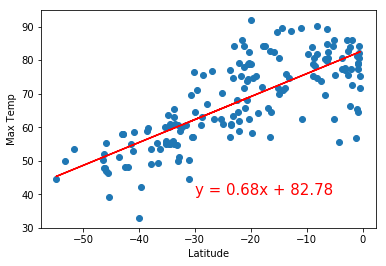

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


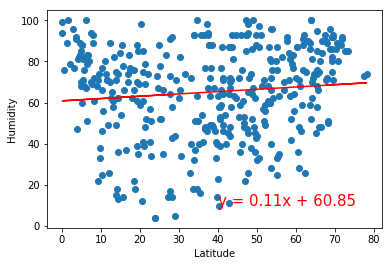

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


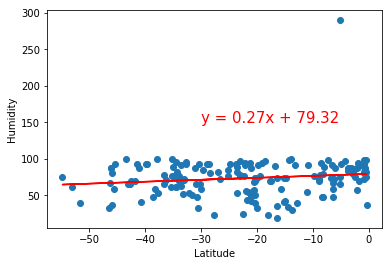

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


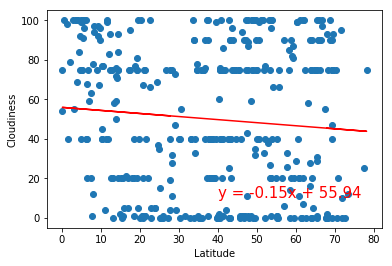

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


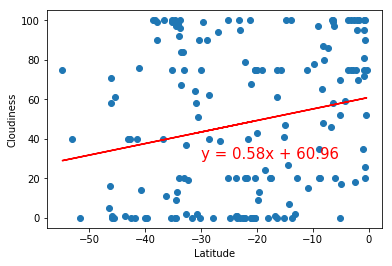

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


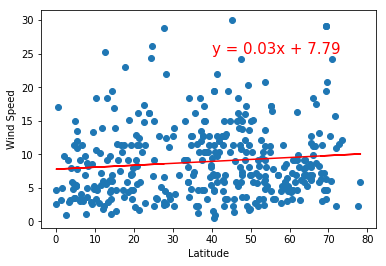

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


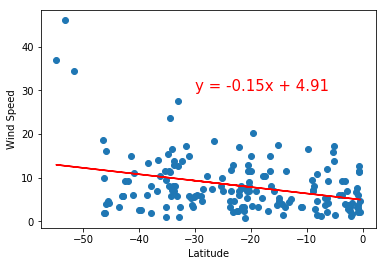